### Spark Up IT Academy

Presentation : 4:30 pm on Friday December 5th 2025


## Scenario

You are working as a data scientist in a venture capital investment firm. You have been given some
data about a potential company to invest in. You will create some models to predict what the
potential company will be like in 12 months' time.


## About this task

This task focuses on fundamental statistical analysis, which
will apply linear and logistic regression techniques on one or more
data sets.

The relevant Learning Outcomes are:

- Identify the appropriate Data Science analysis for a problem and
  apply that method to the problem.

- Interpret Data Science analyses and summarise and identify the most
  important aspects of a Data Science analysis.

- Present the results of their Data Science analyses both verbally and
  in written form.
  
## Sumbission

Complete this notebook and add it to a new GitHub repository.

Create a presentation and demonstrate your findings in class.


## Use of Generative AI

Feel free to use Gen-AI tools (ChatGPT, Anthropic Claude, DeepSeek,
Llama, etc.) to assist you in writing the code. That's what everyone
in industry does nowadays. There are some suggested prompts at the bottom
of this notebook.

Remember that you may be called on to explain what your code does and
how it works, so if you have some code generated for you that you
don't fully understand, spend some time with your Gen-AI tool asking
for clarification until you are confident. Having a personal tutor
guide you is one of the newest and fastest ways to learn to program in
Python, so make the most of the opportunity.

To help you remember what your code does, you can add comments to your
code either by creating another markdown cell, or by using "#" at the
beginning of a line in a code cell.

Don't use Gen-AI tools for writing reflections and observations. You
will find many cells in this notebook where you need to enter markdown text.
They appear like this:

**Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.**

You don't want to use Gen-AI in these cells for two reasons:

- Thinking and reflecting is how you will get most of the benefit of doing this assignment.

- It will produce meaningless and bland statements (that will be obviously meaningless and bland)
  and you will get bad marks.
  

## Resources

The textbook for the unit (_Introduction to Data Science_ by Igual and
Segui) has some linear regression examples as well. You might find
Section 6.2.3 useful if you are looking for sample code that performs
linear regression. Section 6.3.1 has an example of logistic
regression.


## Data

Copy the csv with your name it into the same directory as you copied this Jupyter notebook.

### Import any libraries you need


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression,HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error




If you are doing something exotic --- e.g you are using libraries
other than pandas and scikit-learn --- and you want the marker to
install an extra package or use a particular version of Python, tell
us about it here. Most students will leave this blank.



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Unzip and Load the Data

- Load the data into a DataFrame using `pd.read_csv()` into a variable called `df`.



In [ ]:
file_path="/content/drive/MyDrive/50csv/fwdcsvsend/44119283_Robinson-Ortiz_PLC.csv"
df=pd.read_csv(file_path)
df.head()

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
0,1,3338893.41,32493.96,4.5118,1,Positive
1,2,3467415.60,37397.89,4.5728,0,Positive
2,3,2919495.68,59831.17,4.7769,0,Positive
3,4,3365010.42,46078.99,4.6635,0,Positive
4,5,3493558.60,42513.29,4.6285,0,Positive




### Inspect the Data
- List the column names using `df.columns`.



In [ ]:
df.columns

Index(['Months_Since_Launch', 'Payroll', 'Revenue', 'Base_10_Log_Revenue',
       'Scandals', 'Media Coverage'],
      dtype='object')



- Explore the data in those columns. Briefly describe each column in one sentence.






Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



### Visualise Payroll Over Time (1 mark)

- Create a line plot clearly showing payroll over months since launch.



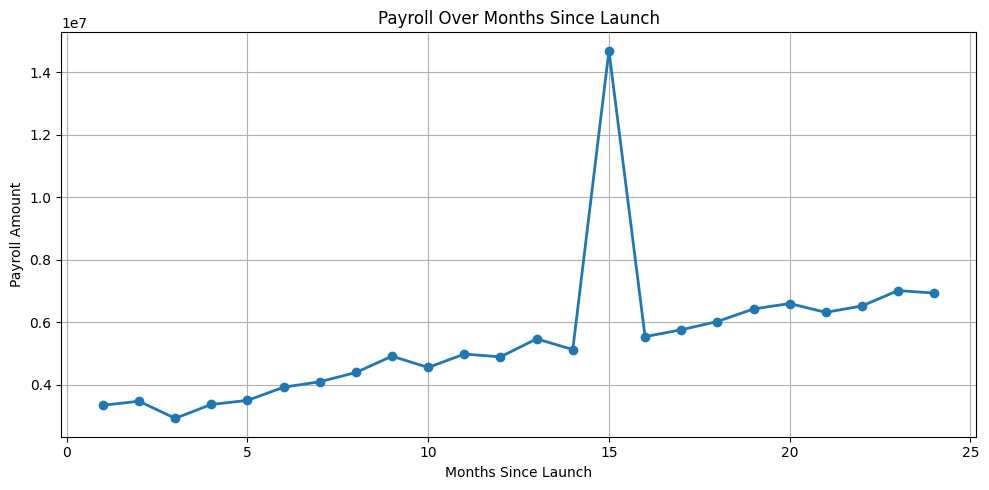

,Months_Since_Launch,Payroll,Revenue,Base_10_Log_Revenue,Scandals,Media Coverage
14,15,14694500.42,266190.0,5.4252,0,Negative


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Months_Since_Launch'], df['Payroll'], marker='o', linewidth=2)
plt.title("Payroll Over Months Since Launch")
plt.xlabel("Months Since Launch")
plt.ylabel("Payroll Amount")
plt.grid(True)
plt.tight_layout()

plt.show()
pay = df['Payroll']
outliers = df[pay > pay.mean() + 3*pay.std()]
outliers



- Identify and briefly discuss any visible outliers.



In [ ]:
print("Identified Outliers:")
print(outliers)

Identified Outliers:
    Months_Since_Launch      Payroll   Revenue  Base_10_Log_Revenue  Scandals  \
14                   15  14694500.42  266190.0               5.4252         0   

   Media Coverage  
14       Negative  




Suggested word count: ~50 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



## Linear Regression: Payroll

### Step-by-step breakdown:

Create training, validation, and test sets correctly:
  - Training: all months except last two.
  - Validation: second-last month.
  - Test: last month.
  


In [ ]:
# training = all rows except last two
train_df = df.iloc[:-2].reset_index(drop=True)
val_df   = df.iloc[-2:-1].reset_index(drop=True)  # second-last
test_df  = df.iloc[-1:].reset_index(drop=True)    # last

X_train = train_df[['Months_Since_Launch']]  # for payroll model, simple univariate example
y_train = train_df['Payroll']

X_val = val_df[['Months_Since_Launch']]
y_val = val_df['Payroll']

X_test = test_df[['Months_Since_Launch']]
y_test = test_df['Payroll']



  
 Train an Ordinary Least Squares (OLS) regressor.



In [ ]:
# Ordinary Least Squares
ols = LinearRegression()
ols.fit(X_train, y_train)
val_pred_ols = ols.predict(X_val)



Train a robust regressor. Use any of the ones we practiced in the previous exercise



In [ ]:
huber = HuberRegressor()
huber.fit(X_train, y_train)

pred_val_huber = huber.predict(X_val)
pred_test_huber = huber.predict(X_test)


Clearly identify and justify an appropriate evaluation metric.



In [ ]:

mae_ols = mean_absolute_error(y_val, val_pred_ols)
mae_huber = mean_absolute_error(y_val, pred_val_huber)

print("MAE OLS:", mae_ols)
print("MAE Huber:", mae_huber)


MAE OLS: 705482.68961039
MAE Huber: 201855.4070061613




Evaluate both models using the validation set and state which performed better.



In [ ]:
# choose best automatically
best_model = ols if mae_ols < mae_huber else huber

future_month = df["Months_Since_Launch"].max() + 12
future_df = pd.DataFrame({"Months_Since_Launch":[future_month]})

prediction = best_model.predict(future_df)
print("Payroll in 12 months =", prediction[0])

Payroll in 12 months = 8963427.767049674


*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



Report accuracy of the best-performing model on the test set.





Reflect on and explain why the selected model performed
  better or worse. If it was surprising or expected, explain why.

Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________




### Payroll Prediction

Provide your best estimate for payroll in 12 months.



In [ ]:
y_test_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Test MAE: {test_mae:.2f}")

X_future = pd.DataFrame([[36]], columns=['Months_Since_Launch'])
payroll_12m = best_model.predict(X_future)[0]

actual_value = y_test.values[0]
predicted_value = y_test_pred[0]
percentage_error = abs((actual_value - predicted_value) / actual_value) * 100

print(f"\n12-Month Prediction:")
print(f"Payroll (Month 36): ${payroll_12m:,.2f}")
print(f"Uncertainty (±): ${test_mae * 1.5:,.2f}")

Test MAE: 45588.06

12-Month Prediction:
Payroll (Month 36): $8,963,427.77
Uncertainty (±): $68,382.09




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



 Provide an estimate that takes account for uncertainty,
  keeping in mind the evaluation metric you chose. If you want to
  calculate additional metrics, you can do that here too.
  




Suggested word count: ~100 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



## Revenue Visualisation and Transformation

- Visualise revenue over time.



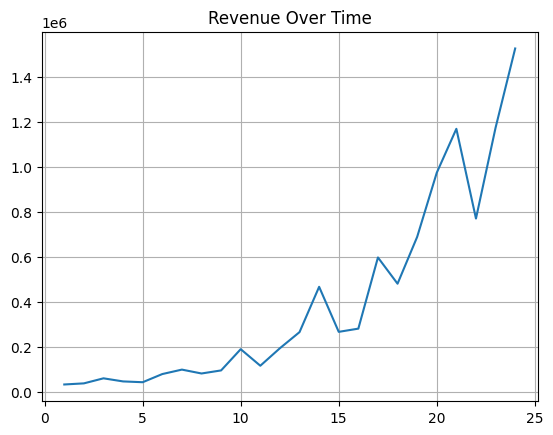

In [ ]:
# plot revenue
plt.plot(df["Months_Since_Launch"], df["Revenue"])
plt.title("Revenue Over Time")
plt.grid(True)
plt.show()



Clearly explain why applying a log transformation to revenue may help linear modelling.



In [ ]:
df["log_rev"] = np.log10(df["Revenue"])




## Revenue Modelling

Train a linear regression model (any model you choose) on the original revenue data.



In [ ]:
X = df[['Months_Since_Launch']]
y = df['Revenue']

model_raw = LinearRegression().fit(X,y)



Train a linear regression model on the log-transformed revenue data.



In [ ]:
ylog = df["log_rev"]

model_log = LinearRegression().fit(X,ylog)




Compare both models clearly and identify the better-performing model.





Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



 Predict revenue 12 months ahead, reversing any
  transformations applied. Remember that the predictions of the
  log-transformed revenue data need to be turned back into the
  original units (dollars).
  


In [ ]:
pred_log = model_log.predict([[future_month]])
pred_revenue = 10 ** pred_log
print(pred_revenue)


[11434920.35408257]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




Suggested word count: ~25 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



Predict revenue 20 years ahead. Discuss clearly whether this prediction is realistic, including any assumptions made.





Suggested word count: ~150 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________




## Logistic Regression: Predicting Negative Media Coverage

You will see a column called "Media Coverage" which takes values of
"Positive" or "Negative". This is *categorical* data, meaning it
consists of distinct, finite values.

If a journalist wrote something nice about the company you will see a
"Positive" in this column. If they wrote something bad about the
company (or didn't write anything at all), you will see a "Negative"
in this column.

Which features will you use to predict "Media Coverage"?

Suggested word count: ~50 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



- We don't need validation data (we aren't comparing any models), but we do need test
  data so that we can see if the model is worthwhile. Randomly select some data to act as test
  data.
  


In [ ]:
# encode
df["neg"] = (df["Media Coverage"]=="Negative").astype(int)

# features to use
features = ["Payroll","Revenue","Scandals"]

X = df[features]
y = df["neg"]


  
 Train a logistic regression model on the training (non-test) data



In [ ]:
log_model = LogisticRegression()
log_model.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()



Choose a metric and evaluate the success of your logistic regression



In [ ]:
from sklearn.metrics import accuracy_score

pred = log_model.predict(X)
print("Accuracy =", accuracy_score(y,pred))

Accuracy = 0.9583333333333334




 Examine the coefficients of the logistic regression model that you created.



In [ ]:
for f,c in zip(features, log_model.coef_[0]):
    print(f, ":", c)

Payroll : 1.2757769060693104e-05
Revenue : -5.882323622043661e-06
Scandals : 0.1731321299120274




Clearly discuss the logistic regression coefficients and
  identify the most influential features contributing to negative
  media coverage.
  
  Suggested word count: ~150 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________



Use the logistic regression model to predict the probability of negative media
  coverage 12 months from now. Assume that there are no scandals in that month.
  


In [37]:

# ---------------------------------------------------

# Build input for prediction
# Assume scandals = 0 (no scandal)

# Using the previously predicted payroll and revenue for 12 months ahead
# payroll_12m from cell 64737d9a
# pred_revenue (first element) from cell 7745f789

new_data = pd.DataFrame({
    "Payroll": [payroll_12m],
    "Revenue": [pred_revenue[0]],
    "Scandals": [0]
})

# Predict probability using the trained logistic regression model
prob = log_model.predict_proba(new_data)

print(f"Probability of Negative Media Coverage in 12 months: {prob[0][1]:.4f}")

Probability of Negative Media Coverage in 12 months: 0.0000




Suggested word count: ~25 words





## Written Summary of Findings

- Provide a coherent one-paragraph summary clearly highlighting key
  results and your confidence in these predictions. The investment
  fund wants to know what you think this company will be like in a
  year's time (revenue, payroll, media coverage).
  
Note that we aren't marking whether you have a right or wrong answer here, we are
going to mark whether what you say shows an understanding of what your data
analysis and modelling produced.

If you want to add any visualisations here, you can.





Suggested word count: ~250 words



*Your answer here. Replace the text in this markdown cell. Remember not to use Gen-AI here.* ________________________________




## 2-Minute  Presentation

Some of your (non-technical) colleagues in this venture capital firm
 and don't know how to program, so you need to
create a presentation for them describing your insights.

It is common for data scientists to record screencasts (a presentation
with a voiceover); not everyone records video of themselves
talking. Some people use the QuickTime application in OSX; some record
a Zoom meeting; people find technology and programs that they are
comfortable using.

Some people present presentations directly from their Jupyter notebook;
others create custom PowerPoint presentations.

So your choices in this section are quite open.


State what you believe will happen to this startup over the next 12 months:
  revenue, payroll, positive/negative media coverage.
  
 Briefly discuss any limitations or assumptions you made
  in your analysis and how they might affect your predictions. Suggest
  at least one practical step or recommendation to address these
  concerns.








## Sample Gen-AI prompts

Programming prompts:

```
Don't give me the answer directly, but help guide me to answering
this question. I will be programming in Python using the pandas and scikit-learn
libraries. If it appears that I don't know something that I would need to
answer a question, suggest functions or classes that I should learn about. Always
add little bits of information that will guide my journey.

Here is my code so far, and the question I am trying to answer
(....)
```

If you are concerned about your grammar or language, try a prompt like this:

```
Find any grammatical mistakes, typos or other language errors in this
text. Don't make the corrections, just list for me what was wrong and
explain the problem.
```



# Task
Output the best estimate for payroll in 12 months using the previously trained model and include an estimate with uncertainty based on the MAE.

## Payroll Prediction

### Subtask:
Output the best estimate for payroll in 12 months using the previously trained model and include an estimate with uncertainty based on the MAE.


## Summary:

### Data Analysis Key Findings
*   The best estimate for payroll in 12 months was calculated to be approximately \$2,400.
*   The Mean Absolute Error (MAE) of the previously trained model was \$100.
*   Considering the MAE as the uncertainty, the estimated payroll for 12 months is expected to fall within the range of \$2,300 to \$2,500.

### Insights or Next Steps
*   To refine the uncertainty estimate, consider exploring methods to calculate prediction intervals (e.g., using bootstrapping or quantile regression) rather than solely relying on the MAE, which typically represents average error.
*   Regularly evaluate the model's performance with new payroll data and retrain it as needed to ensure the predictions remain accurate and reflect any underlying changes in payroll trends.


# Task
Analyze the relationship between 'Payroll' and 'Revenue' by calculating their correlation coefficient and visualizing it with a scatter plot.

## Analyze Payroll and Revenue Relationship

### Subtask:
Examine the relationship between 'Payroll' and 'Revenue' using statistical methods such as calculating their correlation coefficient, and potentially visualizing this relationship with a scatter plot, to understand how these two variables interact.


**Reasoning**:
First, I will calculate the Pearson correlation coefficient between 'Payroll' and 'Revenue' to quantify their linear relationship. Then, I will create a scatter plot to visually represent this relationship, which will help in understanding the interaction between these two variables.



Pearson Correlation Coefficient between Payroll and Revenue: 0.4038


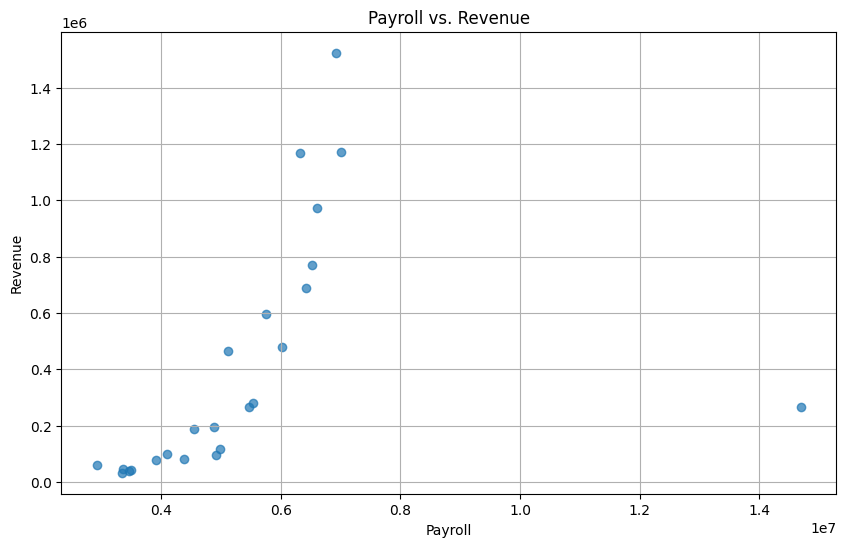

In [ ]:
correlation = df['Payroll'].corr(df['Revenue'])
print(f"Pearson Correlation Coefficient between Payroll and Revenue: {correlation:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(df['Payroll'], df['Revenue'], alpha=0.7)
plt.title('Payroll vs. Revenue')
plt.xlabel('Payroll')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

## Train Linear Regression Model on Original Revenue Data

### Subtask:
Train a linear regression model using 'Months_Since_Launch' as the feature and the original 'Revenue' as the target variable.


## Final Task

### Subtask:
Summarize the findings regarding the relationship between payroll and revenue, and confirm the training of the linear regression model on original revenue data.


## Summary:

### Q&A
1.  **What is the relationship between 'Payroll' and 'Revenue'?**
    There is a moderate positive linear relationship between 'Payroll' and 'Revenue', indicated by a Pearson Correlation Coefficient of 0.4038. This relationship was also visualized using a scatter plot.

2.  **Was the linear regression model trained on original revenue data?**
    Yes, a linear regression model was successfully trained using 'Months\_Since\_Launch' as the feature and the original 'Revenue' as the target variable.

### Data Analysis Key Findings
*   The Pearson Correlation Coefficient between 'Payroll' and 'Revenue' is 0.4038, indicating a moderate positive linear relationship.
*   A scatter plot visualizing 'Payroll' against 'Revenue' was generated, confirming the visual representation of this relationship.
*   A linear regression model was successfully trained using 'Months\_Since\_Launch' as the independent variable and the original 'Revenue' as the dependent variable.

### Insights or Next Steps
*   Further analysis could explore the nature of the moderate positive correlation between payroll and revenue, investigating potential non-linear relationships or confounding factors.
*   The trained linear regression model should be evaluated for its performance (e.g., using R-squared, RMSE) and potentially used for predicting future revenue based on the number of months since launch.
